In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [39]:
p=0.0026167 # parameter in case where new product is refrigerator
q=0.21566 

p2=0.018 # parameter in case where new product is refrigerator
q2=0.0327 

p3=0.027877 # parameter in case where new product is refrigerator
q3=0.25105

p4=0.18119
q4=0.17110

# no of people who have adopted the product initially 
C=106021537 # C is the total population
 # time step of 1 year
start_year=1920

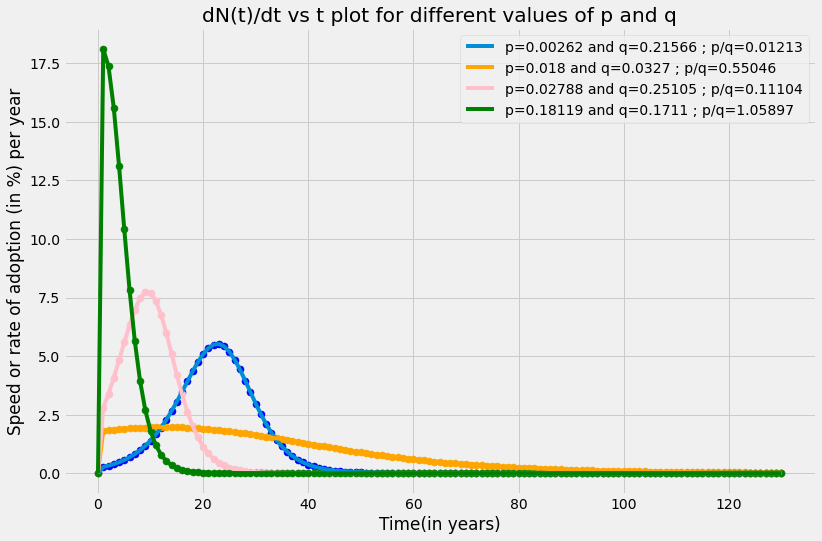

In [40]:
time_step=1
n_t,n_t2,n_t3,n_t4=0,0,0,0

no_of_time_vals=131
time_vals=np.arange(0,no_of_time_vals,time_step) #time_step is taken of 1 year
no_of_people_converted=np.zeros(no_of_time_vals) # no of people converted
no_of_people_converted_for_2nd_val=np.zeros(no_of_time_vals) 
no_of_people_converted_for_3rd_val=np.zeros(no_of_time_vals) 
no_of_people_converted_for_4th_val=np.zeros(no_of_time_vals) 

slope_of_curve=np.zeros(no_of_time_vals)
slope_of_curve2=np.zeros(no_of_time_vals)
slope_of_curve3=np.zeros(no_of_time_vals)
slope_of_curve4=np.zeros(no_of_time_vals)

for t in range(no_of_time_vals):
    time_vals[t]=t
    no_of_people_converted[t]=n_t
    no_of_people_converted_for_2nd_val[t]=n_t2
    no_of_people_converted_for_3rd_val[t]=n_t3
    no_of_people_converted_for_4th_val[t]=n_t4
    n_t=n_t+(p+(q*n_t)/C)*(C-n_t)*time_step # dN(t)/dt=(p+q*N(t)/C)*(C-N(t))
    n_t2=n_t2+(p2+(q2*n_t2)/C)*(C-n_t2)*time_step
    n_t3=n_t3+(p3+(q3*n_t3)/C)*(C-n_t3)*time_step
    n_t4=n_t4+(p4+(q4*n_t4)/C)*(C-n_t4)*time_step
plt.figure(figsize=(12,8))

no_of_people_converted2=no_of_people_converted.copy()
no_of_people_converted_for_2nd_val_2=no_of_people_converted_for_2nd_val.copy()
no_of_people_converted_for_2nd_val_3=no_of_people_converted_for_3rd_val.copy()

no_of_people_converted=(no_of_people_converted/C)*100
no_of_people_converted_for_2nd_val=(no_of_people_converted_for_2nd_val/C)*100
no_of_people_converted_for_3rd_val=(no_of_people_converted_for_3rd_val/C)*100
no_of_people_converted_for_4th_val=(no_of_people_converted_for_4th_val/C)*100

for i in range(1,no_of_time_vals):
    slope_of_curve[i]=(no_of_people_converted[i]-no_of_people_converted[i-1])/time_step
    slope_of_curve2[i]=(no_of_people_converted_for_2nd_val[i]-no_of_people_converted_for_2nd_val[i-1])/time_step
    slope_of_curve3[i]=(no_of_people_converted_for_3rd_val[i]-no_of_people_converted_for_3rd_val[i-1])/time_step
    slope_of_curve4[i]=(no_of_people_converted_for_4th_val[i]-no_of_people_converted_for_4th_val[i-1])/time_step

st='p={} and q={} ; p/q={}'
ratio=round(p/q,5)
p=round(p,5)
st=st.format(p,q,ratio)

st2='p={} and q={} ; p/q={}'
ratio=round(p2/q2,5)
p2=round(p2,5)
st2=st2.format(p2,q2,ratio)

st3='p={} and q={} ; p/q={}'
ratio=round(p3/q3,5)
p3=round(p3,5)
st3=st3.format(p3,q3,ratio)

st4='p={} and q={} ; p/q={}'
ratio=round(p4/q4,5)
p4=round(p4,5)
st4=st4.format(p4,q4,ratio)


plt.title('dN(t)/dt vs t plot for different values of p and q')
plt.xlabel('Time(in years)')
plt.ylabel('Speed or rate of adoption (in %) per year')
#plt.ylabel('Change in Market Share(in %) per year')
plt.plot(time_vals,slope_of_curve,label=st)
plt.plot(time_vals,slope_of_curve2,c='orange',label=st2)
plt.plot(time_vals,slope_of_curve3,c='pink',label=st3)
plt.plot(time_vals,slope_of_curve4,c='green',label=st4)

plt.scatter(time_vals,slope_of_curve,c='blue',s=50)
plt.scatter(time_vals,slope_of_curve2,c='orange',s=50)
plt.scatter(time_vals,slope_of_curve3,c='pink',s=50)
plt.scatter(time_vals,slope_of_curve4,c='green',s=50)
#plt.plot(time_vals,slope_of_curve,label='Speed at which product is being adapted')

plt.legend()
    

In [42]:
def slope_val(n_t,p,q):
    return (p+(q*n_t)/C)*(C-n_t)

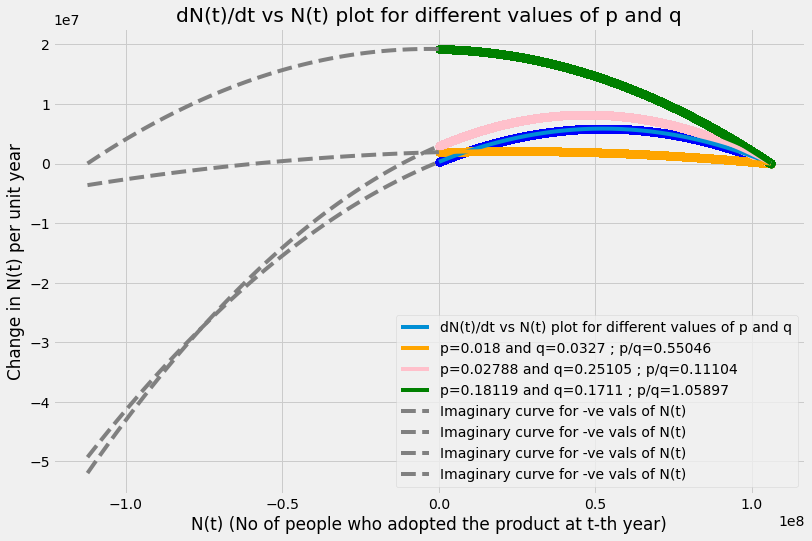

In [45]:
st='dN(t)/dt vs N(t) plot for different values of p and q'
st=st.format(p,q,ratio)

# no_of_people_converted3=no_of_people_converted2.copy()  
# no_of_people_converted2=(p+(q*no_of_people_converted2)/C)
# no_of_people_converted2*=(C-no_of_people_converted3)

plt.figure(figsize=(12,8))
plt.title(st)
plt.xlabel('N(t) (No of people who adopted the product at t-th year)')
plt.ylabel('Change in N(t) per unit year')

pos_x_val=np.arange(0,C,1000)
y_val_1=slope_val(pos_x_val,p,q)
y_val_2=slope_val(pos_x_val,p2,q2)
y_val_3=slope_val(pos_x_val,p3,q3)
y_val_4=slope_val(pos_x_val,p4,q4)

plt.plot(pos_x_val,y_val_1,label=st)
plt.plot(pos_x_val,y_val_2,c='orange',label=st2)
plt.plot(pos_x_val,y_val_3,c='pink',label=st3)
plt.plot(pos_x_val,y_val_4,c='green',label=st4)

plt.scatter(pos_x_val,y_val_1,c='blue',s=50)
plt.scatter(pos_x_val,y_val_2,c='orange',s=50)
plt.scatter(pos_x_val,y_val_3,c='pink',s=50)
plt.scatter(pos_x_val,y_val_4,c='green',s=50)

#plt.plot(time_vals,no_of_people_converted,label='Market share(%) in case of Mixed influence')
# plt.scatter(no_of_people_converted3,no_of_people_converted2,c='r',s=70,label='Discrete points measured')
# plt.plot(no_of_people_converted3,no_of_people_converted2,label='Speed at which product is being adapted')
neg_x_vals=np.linspace((-1)*ratio*C,1000)
plt.plot(neg_x_vals,slope_val(neg_x_vals,p,q),linestyle='dashed',color='grey',label='Imaginary curve for -ve vals of N(t)')
plt.plot(neg_x_vals,slope_val(neg_x_vals,p2,q2),linestyle='dashed',color='grey',label='Imaginary curve for -ve vals of N(t)')
plt.plot(neg_x_vals,slope_val(neg_x_vals,p3,q3),linestyle='dashed',color='grey',label='Imaginary curve for -ve vals of N(t)')
plt.plot(neg_x_vals,slope_val(neg_x_vals,p4,q4),linestyle='dashed',color='grey',label='Imaginary curve for -ve vals of N(t)')

plt.legend()
    